In [1]:
import pandas as pd
import numpy as np
import pyarrow
import os
import math
import re
from collections import Counter
import random
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats
from sklearn.preprocessing import MinMaxScaler

In [2]:
path1 = r'E:\netData\APS\3 Paper\aps-papers-2010-CD5.zip'
path2 = r'E:\netData\APS\3 Paper\aps-papers-2010-SB.zip'
path3 = r'E:\netData\APS\3 Paper\nodepro2010.zip'

In [3]:
f1 = pd.read_csv(path1)
f2 = pd.read_csv(path2)
f3 = pd.read_csv(path3)

In [4]:
f3

,degree,indegree,outdegree,team size,cit5,year,journal,meta,closeness,betweenness,...,eigenvector,h,coreness,pagerank,DI,CD,2stepD,D,id,first_cit_y
0,1,1,0,1,1.0,1913,Physical Review,Physical Review1913,0.666667,0.000000e+00,...,0.000000e+00,1,1,1.105597e-06,NaN,1.000000,1.000000,1.000000,10.1103/PhysRev.1.1,0
1,5,5,0,1,0.0,1913,Physical Review,Physical Review1913,0.159071,0.000000e+00,...,1.116076e-04,2,4,1.797312e-06,NaN,1.000000,1.000000,1.000000,10.1103/PhysRev.1.124,10
2,0,0,0,1,0.0,1913,Physical Review,Physical Review1913,NaN,0.000000e+00,...,0.000000e+00,0,0,4.297752e-07,NaN,0.000000,0.000000,0.000000,10.1103/PhysRev.1.141,0
3,0,0,0,1,0.0,1913,Physical Review,Physical Review1913,NaN,0.000000e+00,...,0.000000e+00,0,0,4.297752e-07,NaN,0.000000,0.000000,0.000000,10.1103/PhysRev.1.154,0
4,4,4,0,1,3.0,1913,Physical Review,Physical Review1913,0.157664,0.000000e+00,...,1.744267e-04,1,3,2.372948e-06,NaN,1.000000,1.000000,1.000000,10.1103/PhysRev.1.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463343,19,10,9,1,5.0,1937,Reviews of Modern Physics,Reviews of Modern Physics1937,0.199643,1.419043e+07,...,1.994768e-03,7,11,9.391861e-06,-0.047244,-0.047244,0.006154,0.015748,10.1103/RevModPhys.9.391,1
463344,2,0,2,1,0.0,1937,Reviews of Modern Physics,Reviews of Modern Physics1937,0.131657,0.000000e+00,...,0.000000e+00,0,2,4.297752e-07,NaN,0.000000,0.000000,0.000000,10.1103/RevModPhys.9.403,0
463345,56,50,6,1,1.0,1937,Reviews of Modern Physics,Reviews of Modern Physics1937,0.222096,1.784951e+06,...,4.156065e-06,12,13,9.709074e-06,0.159420,0.159420,0.039454,0.170290,10.1103/RevModPhys.9.432,3
463346,24,4,20,1,2.0,1937,Reviews of Modern Physics,Reviews of Modern Physics1937,0.165863,3.392220e+06,...,2.294053e-09,2,5,2.722739e-06,-0.030769,-0.030769,0.013699,0.015385,10.1103/RevModPhys.9.44,0


In [4]:
f2['CD5'] = f1['CD5']
f2['indegree'] = f3['indegree']
f2['cit5'] = f3['cit5']
f2['outdegree'] = f3['outdegree']
f2['year'] = f3['year']
f2['team size'] = f3['team size']
f2['first_cit_y'] = f3['first_cit_y']

In [5]:
df = f2[f2['indegree']>10]
df = df[df['outdegree']>0]

In [6]:
df.index = range(len(df))

In [7]:
del df['id']

In [8]:
df

,B,da,CD5,indegree,cit5,outdegree,year,team size,first_cit_y
0,11.984,3,0.500000,17,4.0,2,1917,1,4
1,28.932,2,-0.024943,36,11.0,23,1955,2,0
2,26.899,10,-0.005348,43,4.0,13,1955,2,1
3,7.324,0,-0.136364,27,9.0,7,1955,2,1
4,77.036,43,-0.014706,16,3.0,7,1955,2,2
...,...,...,...,...,...,...,...,...,...
114180,0.000,0,-0.002802,12,12.0,110,2009,3,0
114181,0.000,0,-0.003771,30,30.0,448,2009,4,0
114182,15.492,0,-0.031980,329,94.0,212,1937,2,0
114183,111.484,44,-0.022222,50,1.0,6,1937,1,3


In [9]:
df.columns = ['B',r'$\mathit{t}_{\mathit{\alpha}}$',r'CD$_5$','#cit','#cit5','#ref','pub year','#au','1$^{st}$ cit year']

In [10]:
lenn = len(df.columns)
spearman_matrix = np.zeros([lenn,lenn])
for i in range(lenn):
    for j in range(lenn):
        spearman_matrix[i,j] = scipy.stats.spearmanr(df.iloc[:,i] , df.iloc[:,j]).correlation

spearman_matrix = pd.DataFrame(spearman_matrix, index=df.columns, columns=df.columns)

col_name = df.columns.values

mask = np.zeros_like(spearman_matrix)
for i in range(1, len(mask)):
    for j in range(0, i):
        mask[j][i] = True

In [11]:
spearman_matrix

,B,$\mathit{t}_{\mathit{\alpha}}$,CD$_5$,#cit,#cit5,#ref,pub year,#au,1$^{st}$ cit year
B,1.000000,0.573492,0.134334,0.241505,-0.200387,-0.083321,-0.103622,-0.078347,0.415823
$\mathit{t}_{\mathit{\alpha}}$,0.573492,1.000000,0.172489,-0.104207,-0.539529,-0.150611,-0.228959,-0.127932,0.139724
CD$_5$,0.134334,0.172489,1.000000,-0.130549,-0.240355,0.014477,-0.009537,-0.030063,0.148017
#cit,0.241505,-0.104207,-0.130549,1.000000,0.647427,0.059549,-0.091863,-0.029153,-0.153400
#cit5,-0.200387,-0.539529,-0.240355,0.647427,1.000000,0.223885,0.306891,0.135164,-0.365068
#ref,-0.083321,-0.150611,0.014477,0.059549,0.223885,1.000000,0.324584,0.083823,-0.098360
pub year,-0.103622,-0.228959,-0.009537,-0.091863,0.306891,0.324584,1.000000,0.278201,-0.073686
#au,-0.078347,-0.127932,-0.030063,-0.029153,0.135164,0.083823,0.278201,1.000000,-0.019858
1$^{st}$ cit year,0.415823,0.139724,0.148017,-0.153400,-0.365068,-0.098360,-0.073686,-0.019858,1.000000


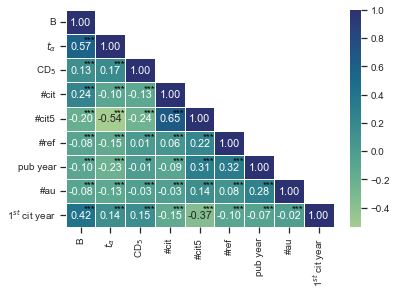

In [25]:
sns.set(context='notebook', style='ticks', font_scale=.9)
g = sns.heatmap(spearman_matrix, annot=True, mask=mask, xticklabels=col_name, yticklabels=col_name, fmt=".2f", linewidth=.5, cmap="crest")

# Add significance level stars
def add_stars(pval):
    if pval < 0.001:
        return "***"
    elif pval < 0.01:
        return "**"
    elif pval < 0.05:
        return "*"
    else:
        return ""

for i in range(lenn):
    for j in range(i):
        p = scipy.stats.spearmanr(df.iloc[:, i], df.iloc[:, j])[1]
        txt = add_stars(p)
        g.text(j+0.8, i+0.25, txt, fontsize=10, ha='center', va='center', color='black')
plt.savefig(r"G:\A J YANG PAPER\APS analysis\Sciento SB CD\figs\fig 3\1.pdf",bbox_inches = 'tight')